# LAB-3
# G. ANVITH REDDY
# AIE21047


# A1. Use librosa.effects.trim() to remove the silence parts of speech from beginning and end of your recorded signal. Listen to the new signal and perceptually compare the audio with original.


C:\Users\anvit\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\anvit\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\anvit\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Original Audio


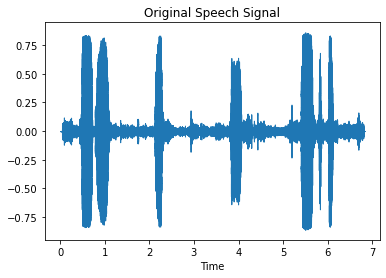

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

y, rs = librosa.load("sp2_anvith.wav")
librosa.display.waveshow(y)
plt.title('Original Speech Signal')

print("Original Audio")
ipd.Audio(data=y, rate=rs)

Trimmed Audio


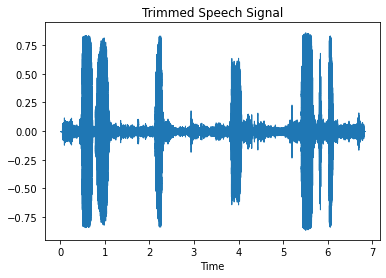

In [2]:
z, index = librosa.effects.trim(y)
librosa.display.waveshow(z)
plt.title('Trimmed Speech Signal')


print("Trimmed Audio")
ipd.Audio(data=z, rate=rs)

# A2. Use librosa.effects.split() to split the recorded speech with detected silences. Play around with the top_db parameter and see the effects of split. Listen to the generated signals and observe the split quality.

In [3]:
w = librosa.effects.split(y, top_db=30)
for i, segment in enumerate(w):
    start, end = segment
    segment_audio = y[start:end]
    print(f"Segment {i+1}: Duration {len(segment_audio)/rs} seconds")

Segment 1: Duration 0.34829931972789113 seconds
Segment 2: Duration 1.1145578231292517 seconds
Segment 3: Duration 0.11609977324263039 seconds
Segment 4: Duration 0.11609977324263039 seconds
Segment 5: Duration 0.4876190476190476 seconds
Segment 6: Duration 0.18575963718820862 seconds
Segment 7: Duration 0.16253968253968254 seconds
Segment 8: Duration 0.25541950113378686 seconds
Segment 9: Duration 0.9520181405895691 seconds
Segment 10: Duration 1.7647165532879818 seconds


C:\Users\anvit\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\anvit\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\anvit\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


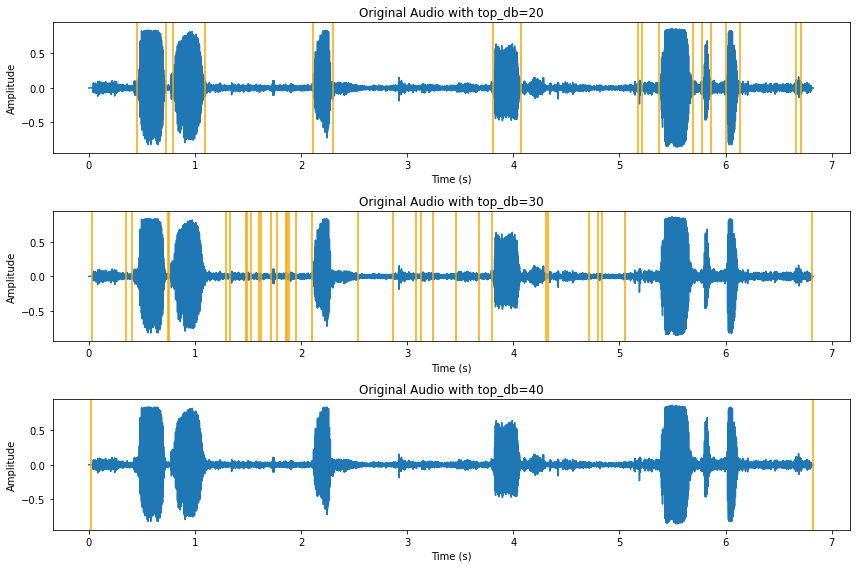

Split Audio with top_db=20:


Split Audio with top_db=30:


Split Audio with top_db=40:


In [1]:
import librosa
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

original_audio_file = "sp2_anvith.wav"
y, rs = librosa.load(original_audio_file, sr=None)

top_db_values = [20, 30, 40]  # Experiment with different top_db values

plt.figure(figsize=(12, 8))

for i, top_db in enumerate(top_db_values):
    intervals = librosa.effects.split(y, top_db=top_db)
    plt.subplot(len(top_db_values), 1, i + 1)
    plt.plot(np.arange(len(y)) / rs, y)
    plt.title(f'Original Audio with top_db={top_db}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    for interval in intervals:
        plt.axvline(interval[0] / rs, color='orange', linestyle='-')
        plt.axvline(interval[1] / rs, color='Orange', linestyle='-')

plt.tight_layout()
plt.show()

for i, top_db in enumerate(top_db_values):
    intervals = librosa.effects.split(y, top_db=top_db)
    split_audio = np.concatenate([y[start:end] for start, end in intervals])

    print(f"Split Audio with top_db={top_db}:")
    ipd.display(ipd.Audio(split_audio, rate=rs))


# A3. Use the IEEE paper reference available above for silence detection. Compare the results with the silence detection output from librosa package

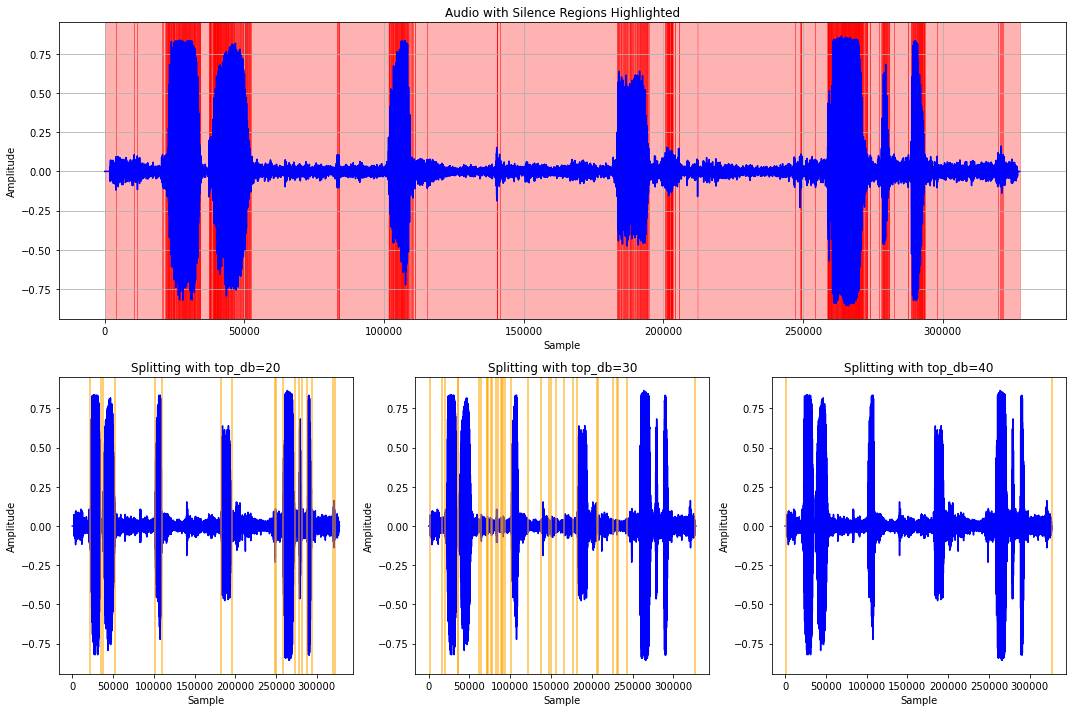

In [6]:
# Define a function to calculate the energy of a given signal
def calculate_energy(signal):
    squared_signal = np.square(signal)  # Calculate the squared signal
    energy = np.sum(squared_signal)  # Calculate the total energy by summing the squared samples
    return energy

# Function to detect silence based on energy threshold
def detect_silence(signal, threshold):
    energy = calculate_energy(signal)
    if energy < threshold:  # If the energy is below the threshold, consider it as silence
        return True
    else:
        return False

# Load the audio file
file_path = "sp2_anvith.wav"
audio_signal, sample_rate = librosa.load(file_path, sr=None)

# Define an energy threshold for silence detection
energy_threshold = 0.01  # Adjust this threshold as needed

# Detect silence regions in the audio
silence_regions = []
current_region = []
for i, sample in enumerate(audio_signal):
    if detect_silence(sample, energy_threshold):
        current_region.append(i)
    elif current_region:
        silence_regions.append(current_region)
        current_region = []
if current_region:
    silence_regions.append(current_region)

# Perform splitting with different top_db values
top_db_values = [20, 30, 40]  # You can adjust these values as needed

# Plot the waveform with silence regions highlighted and split intervals overlaid
plt.figure(figsize=(15, 10))

# Plot the waveform with silence regions highlighted
plt.subplot(2, 1, 1)
plt.plot(audio_signal, color='b')
for region in silence_regions:
    plt.axvspan(region[0], region[-1], color='r', alpha=0.3)
plt.title("Audio with Silence Regions Highlighted")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot the waveform with split intervals overlaid
for i, top_db in enumerate(top_db_values):
    plt.subplot(2, len(top_db_values), len(top_db_values) + i + 1)
    split_audio_intervals = librosa.effects.split(audio_signal, top_db=top_db)
    plt.plot(audio_signal, color='b')
    for interval in split_audio_intervals:
        plt.axvline(interval[0], color='orange', linestyle='-', alpha=0.7)
        plt.axvline(interval[1], color='orange', linestyle='-', alpha=0.7)
    plt.title(f"Splitting with top_db={top_db}")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.tight_layout()

plt.show()